In [1]:
#!/usr/local/bin/python3
# -*- coding: utf-8 -*-

# 1.Загрузка данных

In [2]:
import pandas as pd
df_by_users = pd.read_csv('hw_abt_2_byuser.csv', delimiter='	', index_col= 0)
df_by_users

,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,8,6630.000,0,0,0,8,A
1,13,6933.976,0,0,1,6,B
2,10,8261.976,1,10,1,8,B
3,4,5522.000,1,9,1,7,A
4,16,5075.976,1,6,0,8,B
...,...,...,...,...,...,...,...
4995,6,3666.000,1,4,1,5,A
4996,12,6464.976,0,0,1,8,B
4997,1,4335.000,0,0,0,8,A
4998,13,6307.976,0,0,1,8,B


In [3]:
df_by_bucket = pd.read_csv('hw_abt_2_bybucket.csv', delimiter='	', index_col= 0)
df_by_bucket

,metric_value,users,visits,churn_users,churn_visits
group_id,,,,,
1,1875345.000,155,1419,151,2207
2,1662237.000,138,1320,127,1853
3,1784372.000,128,1281,159,2032
4,1876826.000,163,1644,168,2172
5,1913180.000,156,1675,174,2273
6,1733079.000,144,1509,141,2009
7,1864555.000,151,1481,161,2139
8,2029143.000,162,1533,153,2299
9,2047289.536,143,1424,242,2191


Поиск неоднозначностей и удаление ошибочных данных

In [4]:
df_by_users.loc[(df_by_users['users'] == 0) & (df_by_users['visits'] > 1)]

,group_id,metric_value,users,visits,churn_users,churn_visits,group


In [5]:
df_by_users.loc[(df_by_users['users'] == 1) & (df_by_users['visits'] == 0)]

,group_id,metric_value,users,visits,churn_users,churn_visits,group
27,15,5181.976,1,0,0,9,B
53,2,5989.000,1,0,1,6,A
71,8,8102.000,1,0,0,5,A
89,16,7727.976,1,0,1,5,B
161,5,8057.000,1,0,0,6,A
...,...,...,...,...,...,...,...
4915,8,7650.000,1,0,1,7,A
4924,8,5538.000,1,0,0,9,A
4960,11,7034.976,1,0,1,7,B
4968,2,7295.000,1,0,0,9,A


In [6]:
#Удаление строк с ошибками в данных
df_by_users_drop = df_by_users.drop(df_by_users[(df_by_users['users'] == 1) & (df_by_users['visits'] == 0.0)].index)
df_by_users_drop.loc[(df_by_users_drop['users'] == 1) & (df_by_users_drop['visits'] == 0)]

,group_id,metric_value,users,visits,churn_users,churn_visits,group


# 2.Проведите оценку равенства дисперсий исследуемых метрик в группах и исследуйте распределение на нормальность. Какими критериями вы воспользовались и почему?

In [7]:
# Выборка группы А
df_by_users_A = df_by_users_drop.loc[df_by_users_drop['group'] == 'A']
display(df_by_users_A.head(3))
# Выборка группы B
df_by_users_B = df_by_users_drop.loc[df_by_users_drop['group'] == 'B']
display(df_by_users_B.head(3))

,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,8,6630.0,0,0,0,8,A
3,4,5522.0,1,9,1,7,A
5,2,8539.0,0,0,0,8,A


,group_id,metric_value,users,visits,churn_users,churn_visits,group
1,13,6933.976,0,0,1,6,B
2,10,8261.976,1,10,1,8,B
4,16,5075.976,1,6,0,8,B


In [8]:
# Исследование распределения на нормальность
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution

import numpy as np
from scipy.stats import shapiro
st = shapiro(df_by_users_A['metric_value'])
st

ShapiroResult(statistic=0.9952249526977539, pvalue=7.64896753935318e-07)

In [9]:
st = shapiro(df_by_users_B['metric_value'])
st

ShapiroResult(statistic=0.9923033118247986, pvalue=4.5258774505896326e-10)

Для групп A и B распределение metric_value не является нормальным на всех стандартных уровнях значимости. Отсюда следует, что для тестирования равенства дисперсий необходимо применять непараметрические методы или критерий Левене, который менее чувствительный к требованию нормальности распределения.

In [10]:
#Дисперсия для группы A
df_by_users_A['metric_value'].std()

1707.6117235182492

In [11]:
#Дисперсия для группы B
df_by_users_B['metric_value'].std()

1706.4557993207295

In [12]:
# Из параметрических наименее чувствительный к отклонению от нормального - тест Левене
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
from scipy.stats import levene
st = levene(df_by_users_A['metric_value'], df_by_users_B['metric_value'])
st

LeveneResult(statistic=0.4248644903143499, pvalue=0.5145510162858905)

Нулевая гипотеза о равенсте дисперсий двух выборок не отвергается на всех стандартных уровнях значимости.

# 3.Оцените статистическую значимость различий исследуемых метрик в выборках при помощи библиотеки bootstrapped

In [13]:
!pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13960 sha256=0ebfe584eb54b9f6d5e886302ff0cd390d255ebe39e924358cbf2afac31f5678
  Stored in directory: c:\users\vanes\appdata\local\pip\cache\wheels\f8\7f\03\05e24ae9c42b7583b5b4c458f6b0d53d23c2481e31b30a2fef
Successfully built bootstrapped


In [14]:
import matplotlib.pyplot as plt

from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats

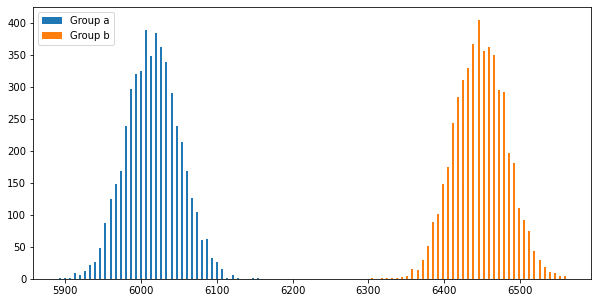

In [15]:
bs_a = bs.bootstrap(df_by_users_A['metric_value'].values, stat_func=bs_stats.mean, 
             num_iterations=5000, iteration_batch_size=50, 
             return_distribution=True)

bs_b = bs.bootstrap(df_by_users_B['metric_value'].values, stat_func=bs_stats.mean, 
             num_iterations=5000, iteration_batch_size=50, 
             return_distribution=True)

plt.figure(figsize=(10,5))
plt.hist([bs_a, bs_b], bins = 100, label=['Group a', 'Group b'])
plt.legend(loc='upper left')
plt.show()

In [16]:
st = shapiro(bs_a)
st

ShapiroResult(statistic=0.9995309710502625, pvalue=0.26472270488739014)

In [17]:
st = shapiro(bs_b)
st

ShapiroResult(statistic=0.9995546340942383, pvalue=0.3109321594238281)

Для групп A и B распределение является нормальным на всех стандартных уровнях значимости. Отсюда следует, что для тестирования равенства средних можно применять параметрические методы.

In [18]:
from scipy.stats import ttest_ind

# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

st = ttest_ind(bs_a, bs_b)
st

Ttest_indResult(statistic=-616.5689870120217, pvalue=0.0)

На всех стандартных уровнях значимости нулевая гипотеза отвергается, metric value для группы Б увеличилось по сравнению с группой А

# 4.Изобразите гистограммы и диаграммы размаха.

Без применения Bootstrapped

<AxesSubplot:xlabel='group', ylabel='metric_value'>

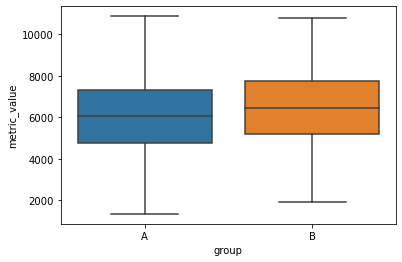

In [19]:
import seaborn as sns
sns.boxplot(y='metric_value', x='group', data = df_by_users_drop)

<AxesSubplot:xlabel='metric_value', ylabel='Density'>

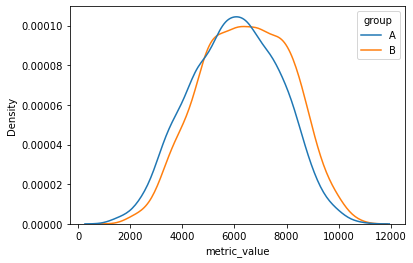

In [20]:
sns.kdeplot(data=df_by_users_drop, x="metric_value", hue="group")

С применением Bootstrapped

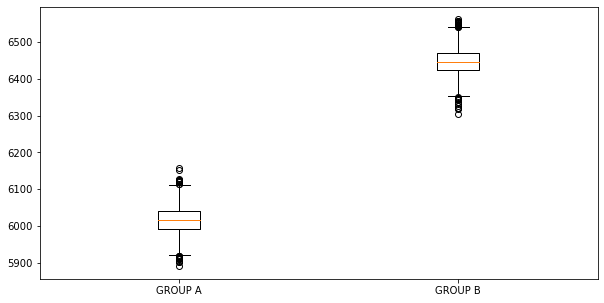

In [21]:
plt.figure(figsize=(10,5))
plt.boxplot([bs_a, bs_b])
x = np.arange(1,3)
plt.xticks(x, ('GROUP A', 'GROUP B'))
plt.show()

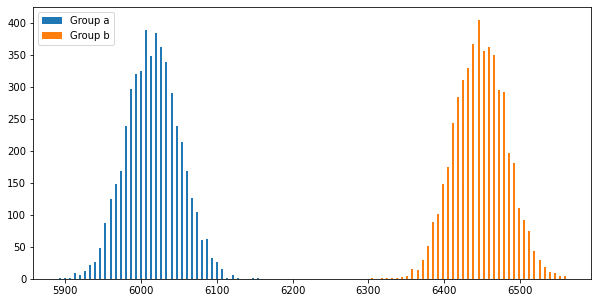

In [22]:
plt.figure(figsize=(10,5))
plt.hist([bs_a, bs_b], bins = 100, label=['Group a', 'Group b'])
plt.legend(loc='upper left')
plt.show()